# Inspect available atmospheric models

Let's explore relevant information about the atmospheric models available via SEDA.

In [1]:
import seda
import os


    SEDA v0.5.1.dev2 package imported


Define first the atmospheric models of interest.

Available models:

In [2]:
seda.models.Models().available_models

['BT-Settl',
 'ATMO2020',
 'Sonora_Elf_Owl',
 'SM08',
 'Sonora_Bobcat',
 'Sonora_Diamondback',
 'Sonora_Cholla',
 'LB23']

Read relevant information from models of interst.

Let's select the 'Sonora_Elf_Owl' grid:

In [3]:
model = 'Sonora_Elf_Owl'

Read some parameters:

In [4]:
print(seda.models.Models(model).ref) # reference
print(seda.models.Models(model).ADS) # link to paper
print(seda.models.Models(model).download) # link to download the models
print(seda.models.Models(model).free_params) # free parameters in the grid

Mukherjee et al. (2024)
https://ui.adsabs.harvard.edu/abs/2024ApJ...963...73M/abstract
['https://zenodo.org/records/10385987', 'https://zenodo.org/records/10385821', 'https://zenodo.org/records/10381250']
['Teff', 'logg', 'logKzz', 'Z', 'CtoO']


Look at other available parameters:

In [5]:
help(seda.models.Models)

Help on class Models in module seda.models:

class Models(builtins.object)
 |  Models(model=None)
 |  
 |  Description:
 |  ------------
 |          See available atmospheric models and get basic parameters from a desired model grid.
 |  
 |  Parameters:
 |  -----------
 |  - model : str, optional.
 |          Atmospheric models for which basic information will be read. 
 |          See available models with ``seda.Models().available_models``.
 |  
 |  Attributes:
 |  -----------
 |  - available_models (list) : Atmospheric models available on SEDA.
 |  - ref (str) : Reference to ``model`` (if provided).
 |  - name (str) : Name of ``model`` (if provided).
 |  - bibcode (str) : bibcode identifier for ``model`` (if provided).
 |  - ADS (str) : ADS links to ``model`` (if provided) reference.
 |  - download (str) : link to download ``model`` (if provided).
 |  - filename_pattern (str) : common pattern in all spectra filenames in ``model`` (if provided). 
 |          It is used to avoid othe

Read more about the [available models](https://seda.readthedocs.io/en/latest/overview.html#available-atmospheric-models).

Check the free parameters in the grid along with their ranges and unique values:

In [6]:
seda.models.Models(model).params_unique

{'Teff': array([ 275.,  300.,  325.,  350.,  375.,  400.,  425.,  450.,  475.,
         500.,  525.,  550.,  575.,  600.,  650.,  700.,  750.,  800.,
         850.,  900.,  950., 1000., 1100., 1200., 1300., 1400., 1500.,
        1600., 1700., 1800., 1900., 2000., 2100., 2200., 2300., 2400.]),
 'logg': array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ]),
 'logKzz': array([2., 4., 7., 8., 9.]),
 'Z': array([-1. , -0.5,  0. ,  0.5,  0.7,  1. ]),
 'CtoO': array([0.5, 1. , 1.5, 2. , 2.5])}

**Inspect the coverage of the free parameters in the model grid.**

Plot "logg" against "Teff". We can use any combination of free parameters in the models.

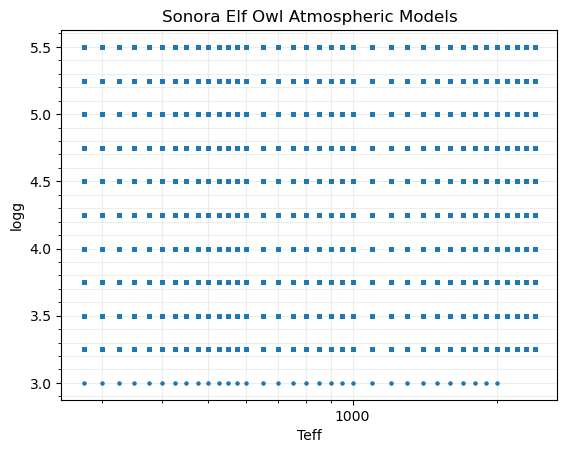

In [9]:
xparam = 'Teff'
yparam = 'logg'
seda.plots.plot_model_coverage(model=model, xparam=xparam, yparam=yparam, xlog=True, save=True)

**Inspect the resolution of the models.**

We need to provide a spectrum name or list of spectra names with the full path for which we want to check the resolution. 

    Caveat: plotting the resolution of many high-resolution spectra may be quite slow and won't necessarily provide additional information.

The directory `seda/models_aux/model_spectra/` contains a synthetic spectrum from all available models, as an example, as shown below:

In [10]:
path_models = os.path.dirname(seda.__file__)+'/models_aux/model_spectra/'
with open(path_models+'README', 'r') as f:
    content = f.read()
    print (content)

Example of synthetic spectra and their corresponding atmospheric models.

Sonora Diamondback model spectrum:     t1000g316f4_m0.0_co1.0.spec
Sonora Elf Owl model spectrum:         spectra_logzz_4.0_teff_1200.0_grav_1000.0_mh_0.0_co_0.5.nc
Lacy & Burrows (2023):                 T700_g5.00_Z1.000_CDIFF1e6_HMIX1.000.21
Sonora Cholla model spectrum:          1000K_1000g_logkzz2.spec
Sonora Bobcat model spectrum:          sp_t1000g1000nc_m0.0
ATMO 2020 model spectrum:              spec_T1000_lg4.0_NEQ_weak.txt
BT-Settl model spectrum:               lte010-4.0-0.0a+0.0.BT-Settl.spec.7
Saumon & Marley (2008) model spectrum: sp_t1000g1000f1



Plot resolving power as a function of wavelength:

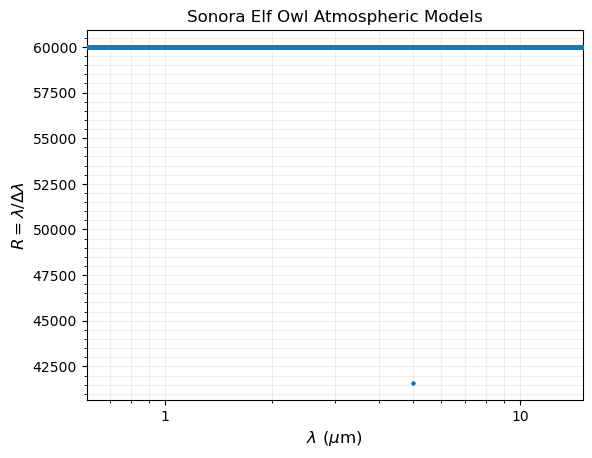

In [16]:
# name with full path for the model spectrum of interest
# select the synthetic spectrum corresponding to the models of interest
model_spectrum = path_models+'spectra_logzz_4.0_teff_1200.0_grav_1000.0_mh_0.0_co_0.5.nc' # Elf Owl spectrum

# make the plot
seda.plots.plot_model_resolution(model, model_spectrum)

Let's plot now the spectral resolution vs. wavelength

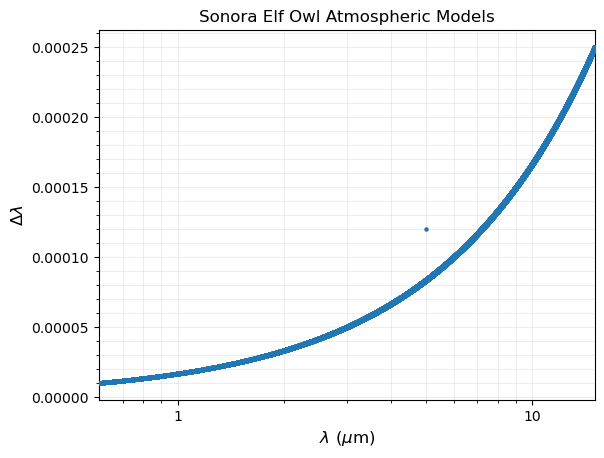

In [17]:
seda.plots.plot_model_resolution(model, model_spectrum, resolving_power=False)

Let's check the resolution of the Sonora Diamondback models

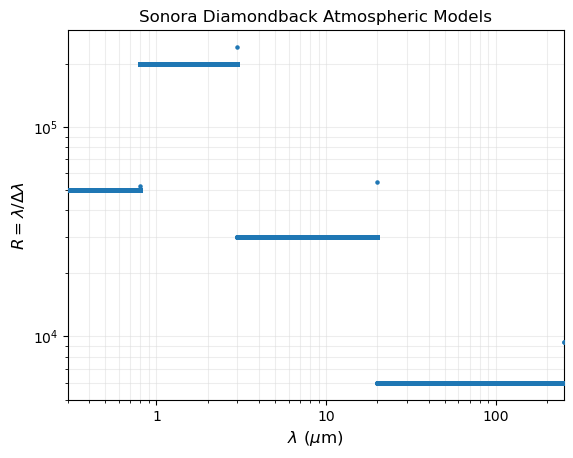

In [18]:
# get the names of all the spectra in the input directories
model = 'Sonora_Diamondback'
model_spectrum = path_models+'t1000g316f4_m0.0_co1.0.spec' # Diamondback spectrum

seda.plots.plot_model_resolution(model, model_spectrum, ylog=True, save=True)

We can consider the resolution in logarithmic steps for wavelength

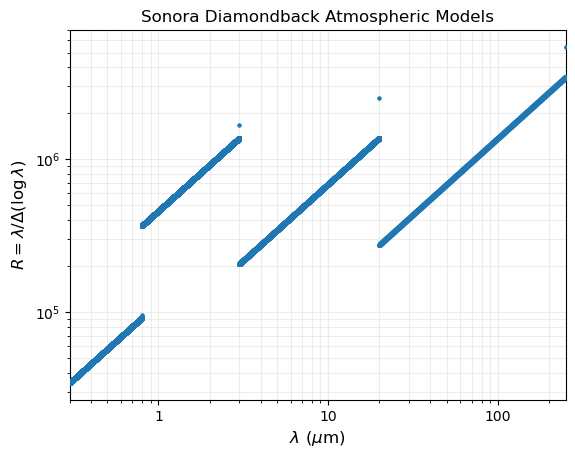

In [19]:
seda.plots.plot_model_resolution(model, model_spectrum, delta_wl_log=True, ylog=True)